In [26]:
library(rjson)
library(ggplot2)
library(viridis)

In [27]:
data_name_range = c('ATAC_JV_adipose','CTCF_TDH_ENCODE','H3K27ac-H3K4me3_TDHAM_BP','H3K27ac_TDH_some',
                    'H3K36me3_AM_immune','H3K27me3_RL_cancer','H3K27me3_TDH_some','H3K36me3_TDH_ENCODE',
                    'H3K36me3_TDH_immune','H3K36me3_TDH_other')

In [28]:
get_run_time_data<- function(data_name,models_domain){
    
    folds           = vector()
    models          = vector()
    distri          = vector()
    run_time        = vector()
    
    for(model in models_domain){

        if(model=="xgboost"){
            file_name       = paste('../../../../result/',data_name,'/',model,'/run_dis_time_tuning.json',sep="")
            run_time_model  = fromJSON(file = file_name)
            keys      = names(run_time_model)
            n         = length(keys)
            fold_dis  = unlist(strsplit(keys,"_"))
            folds     = c(folds,fold_dis[seq(1,length(fold_dis),2)])
            distri    = c(distri,fold_dis[seq(2,length(fold_dis),2)])
            run_time  = c(run_time,as.numeric(run_time_model))
            distri    = paste(model,distri,sep="_")
            models    = c(models,distri)

        }

        else{
            file_name = paste('../../../../result/',data_name,'/',model,'/run_time.JSON',sep="")
            run_time_model  = fromJSON(file = file_name)
            n               = length(names(run_time_model))
            folds           = c(folds,names(run_time_model))
            run_time        = c(run_time,as.numeric(run_time_model))
            models          = c(models,rep(model,n))
        }
    }
    n              = length(folds)
    attribute_type = rep("Run Time in secs",n)
    data           = rep(data_name,n)
    run_data_iter  = data.frame("folds"=folds,"models"=models,"attribute"=run_time,"attribute_type"=attribute_type,"data"=data)
    return(run_data_iter)
}

In [32]:
get_accuracy_data <- function(data_name,models_domain){
    
    folds            = vector()
    models           = vector()
    accuracys        = vector()
    
    for(model in models_domain){
        if(model=='xgboost'){
            for(distribution in c('normal','logistic','extreme')){
                file_name    = paste('../../../../result/',data_name,'/',model,'/accuracy_',distribution,'.JSON',sep="")
                accuracy     = fromJSON(file = file_name)
                distri       = paste(model,distribution,sep="_")
                nfold        = length(names(accuracy))
                folds        = c(folds,names(accuracy))
                models       = c(models,rep(distri,nfold))
                accuracys    = c(accuracys,as.numeric(accuracy))
            }
        }
        else{
            file_name    = paste('../../../../result/',data_name,'/',model,'/accuracy.JSON',sep="")
            accuracy     = fromJSON(file = file_name)
            nfold        = length(names(accuracy))
            folds        = c(folds,names(accuracy))
            models       = c(models,rep(model,nfold))
            accuracys    = c(accuracys,as.numeric(accuracy))
        }
    }
    
    n                   = length(folds)
    attribute_type      = rep("Accuracy",n)
    data                = rep(data_name,n)
    accuracy_data_iter  = data.frame("folds"=folds,"models"=models,"attribute"=accuracys,"attribute_type"=attribute_type,"data"=data)
    return(accuracy_data_iter)
}

In [33]:
combined_data        = data.frame()
models_domain        = c('intervalCV','survreg','xgboost')

In [34]:
for(i in c(1,2,3)){
    data_name          = data_name_range[i]
    run_data_iter      = get_run_time_data(data_name,models_domain)
    accuracy_data_iter = get_accuracy_data(data_name,models_domain)
    combined_data      = rbind(combined_data,run_data_iter)
    combined_data      = rbind(combined_data,accuracy_data_iter)
}

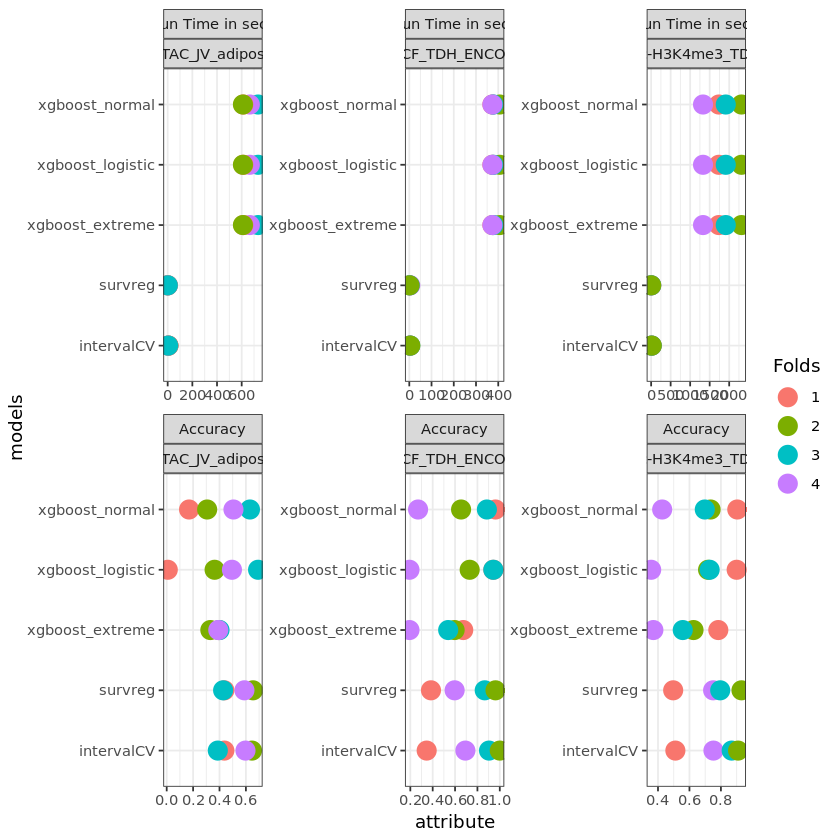

In [51]:
p <- ggplot(combined_data, aes(x=attribute,y=models,colour = factor(folds)))+ geom_point(size=5)+labs(color='Folds')
p <- p +facet_wrap(attribute_type~data,scales="free")+ theme_bw()
p